<a href="https://colab.research.google.com/github/atharvanaik10/worldwide/blob/main/MITPH_Housing_Data_Analysis_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Possible Analysis Routes - Demand for Housing
1. Time series on previous data using Prophet
2. Add rent increases, income disparity, health conditions as features --> might need a regression model for this prediction

We can predict using a time-series model, and a regression model, and analyse both predictions. 

## 1. Time Series Analysis prediction of homelessness

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import prophet
import matplotlib

Mounted at /content/drive


In [ ]:
# Import Point-In-Time (PIT) data as dataframe from excel sheet.
# This represents our "demand" or measured homelessness

pit_dfs = pd.read_excel("/content/drive/MyDrive/Other/MIT Policy Hackathon - Worldwide/data/2007-2021-PIT-Counts-by-State.xlsx",
                       sheet_name=None)

In [ ]:
# Filter out MA data and overall homeless
overall_homeless = []
years = ['2021-01-01', 
         '2020-01-01', 
         '2019-01-01', 
         '2018-01-01', 
         '2017-01-01', 
         '2016-01-01', 
         '2015-01-01', 
         '2014-01-01', 
         '2013-01-01', 
         '2012-01-01', 
         '2011-01-01', 
         '2010-01-01', 
         '2009-01-01', 
         '2008-01-01', 
         '2007-01-01']

for df in pit_dfs.values():
  df = df[df.State == "MA"]
  overall_homeless.append(df.iat[0,2])

overall_pit_df = pd.DataFrame(np.array([years, overall_homeless]).T, columns=["ds", "y"])
display(overall_pit_df)

,ds,y
0,2021-01-01,12544
1,2020-01-01,17975
2,2019-01-01,18471
3,2018-01-01,20068
4,2017-01-01,17565
5,2016-01-01,19608
6,2015-01-01,21135
7,2014-01-01,21237
8,2013-01-01,19029
9,2012-01-01,17501


### 1. (a) Using Facebook's Prophet Time-Series Analysis Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh0j_i5j/7hd3nn3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh0j_i5j/klmptesh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53770', 'data', 'file=/tmp/tmpjh0j_i5j/7hd3nn3d.json', 'init=/tmp/tmpjh0j_i5j/klmptesh.json', 'output', 'file=/tmp/tmpjh0j_i5j/prophet_model4swre5wb/prophet_model-20221016171834.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,-9104.535507,13808.398081,19689.503623,-9104.535507,-9104.535507,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,0.0,0.0,0.0,16742.680861
1,2008-01-01,-8947.680454,14216.623019,20071.249776,-8947.680454,-8947.680454,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,0.0,0.0,0.0,17018.022444
2,2009-01-01,-8790.395661,13494.438181,19063.501079,-8790.395661,-8790.395661,24964.850858,24964.850858,24964.850858,24964.850858,24964.850858,24964.850858,0.0,0.0,0.0,16174.455197
3,2010-01-01,-8633.540608,14213.540852,19742.917654,-8633.540608,-8633.540608,25513.468356,25513.468356,25513.468356,25513.468356,25513.468356,25513.468356,0.0,0.0,0.0,16879.927748
4,2011-01-01,-8476.685555,14424.890021,20179.096150,-8476.685555,-8476.685555,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,0.0,0.0,0.0,17370.530813
5,2012-01-01,-8319.830502,14939.623030,20508.974187,-8319.830502,-8319.830502,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,0.0,0.0,0.0,17645.872395
6,2013-01-01,-8162.545709,13901.898011,19564.609452,-8162.545709,-8162.545709,24964.850858,24964.850858,24964.850858,24964.850858,24964.850858,24964.850858,0.0,0.0,0.0,16802.305149
7,2014-01-01,-8005.690657,14368.072241,20546.846853,-8005.690657,-8005.690657,25513.468356,25513.468356,25513.468356,25513.468356,25513.468356,25513.468356,0.0,0.0,0.0,17507.777699
8,2015-01-01,-7848.835776,15216.793038,20904.103729,-7848.835776,-7848.835776,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,25847.216368,0.0,0.0,0.0,17998.380591
9,2016-01-01,-7691.980897,15635.880858,21367.163190,-7691.980897,-7691.980897,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,25965.702897,0.0,0.0,0.0,18273.722001


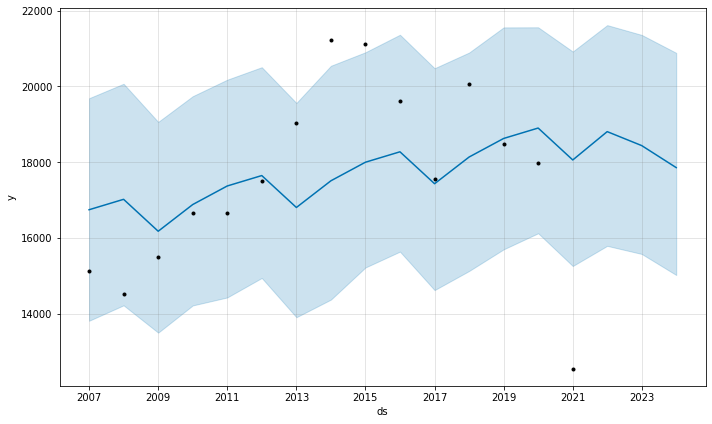

In [ ]:
# Create prophet model
model = prophet.Prophet()
model.fit(overall_pit_df)

future = model.make_future_dataframe(periods=3, freq='Y')
forecast = model.predict(future)
fig = model.plot(forecast)
display(forecast)

## 2. Improving this model

We notice that due to the lack of more frequent data and the lack of a larger range of time, this model is sparse and the predictions may be incorrect. We have to look at more creative ways of interpolating data. 

It is widely known that factors such as income, cost of living, and health play a big role in homelessness. Since data and predictions on health and income are more readily available, we will use these as features on a multivariate time-series model to better predict homelessness.

We find that the most important factors that affect homelessness are:

1. Rent Inflation (https://endhomelessness.org/blog/rising-rents-and-inflation-are-likely-increasing-low-income-families-risk-of-homelessness/)
  - We use the Consumer Price Index (CPI) for All Urban Consumers focused on the Boston-Cambridge-Newton area (https://data.bls.gov/timeseries/CUURS11ASA0?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true) as a general indicator that accounts for inflation and cost of living. The source of this data is the US Bureau of Labor Statistics

2. Health conditions like disabilities, mental illness, HIV/AIDS, and alcohol and drug abuse (https://endhomelessness.org/homelessness-in-america/what-causes-homelessness/health/)

In [ ]:
# Get CPI annual data
cpi_df = pd.read_excel("/content/drive/MyDrive/Other/MIT Policy Hackathon - Worldwide/data/Bos-Cam-New_CPI_Urban.xlsx",
                       usecols="A,N")


# Build array of combined pit and cpi data
annual_cpi = cpi_df["Annual"].to_numpy().T
overall_df = pd.DataFrame(np.array([years, overall_homeless, annual_cpi]).T, columns=["ds", "y", "CPI"])
display(overall_df)

,ds,y,CPI
0,2021-01-01,12544,227.409
1,2020-01-01,17975,235.37
2,2019-01-01,18471,233.778
3,2018-01-01,20068,237.446
4,2017-01-01,17565,243.881
5,2016-01-01,19608,247.733
6,2015-01-01,21135,251.139
7,2014-01-01,21237,255.184
8,2013-01-01,19029,256.715
9,2012-01-01,17501,260.496


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh0j_i5j/co083wxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjh0j_i5j/tpherop6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46807', 'data', 'file=/tmp/tmpjh0j_i5j/co083wxp.json', 'init=/tmp/tmpjh0j_i5j/tpherop6.json', 'output', 'file=/tmp/tmpjh0j_i5j/prophet_modelwedyz_zw/prophet_model-20221016174712.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:47:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

,ds,CPI
0,2007-01-01,227.409
1,2008-01-01,235.370
2,2009-01-01,233.778
3,2010-01-01,237.446
4,2011-01-01,243.881
5,2012-01-01,247.733
6,2013-01-01,251.139
7,2014-01-01,255.184
8,2015-01-01,256.715
9,2016-01-01,260.496


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,CPI,CPI_lower,CPI_upper,additive_terms,...,extra_regressors_multiplicative,extra_regressors_multiplicative_lower,extra_regressors_multiplicative_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-01-01,211.322379,22095.969347,24428.396325,211.322379,211.322379,17.624707,17.624707,17.624707,19285.534685,...,17.624707,17.624707,17.624707,17.624707,17.624707,17.624707,19285.534685,19285.534685,19285.534685,23221.352042
1,2008-01-01,233.334743,20982.699624,23349.300489,233.334743,233.334743,12.838497,12.838497,12.838497,18929.605295,...,12.838497,12.838497,12.838497,12.838497,12.838497,12.838497,18929.605295,18929.605295,18929.605295,22158.607464
2,2009-01-01,255.289193,20945.163990,23415.099276,255.289193,255.289193,13.795619,13.795619,13.795619,18384.919743,...,13.795619,13.795619,13.795619,13.795619,13.795619,13.795619,18384.919743,18384.919743,18384.919743,22162.081325
3,2010-01-01,277.183657,21443.357204,23756.430319,277.183657,277.183657,11.590391,11.590391,11.590391,19103.913246,...,11.590391,11.590391,11.590391,11.590391,11.590391,11.590391,19103.913246,19103.913246,19103.913246,22593.763918
4,2011-01-01,299.078122,20723.643039,23064.258856,299.078122,299.078122,7.721623,7.721623,7.721623,19285.534685,...,7.721623,7.721623,7.721623,7.721623,7.721623,7.721623,19285.534685,19285.534685,19285.534685,21893.981453
5,2012-01-01,319.501656,19852.776146,22158.567739,319.501656,319.501656,5.405774,5.405774,5.405774,18929.605295,...,5.405774,5.405774,5.405774,5.405774,5.405774,5.405774,18929.605295,18929.605295,18929.605295,20976.260603
6,2013-01-01,326.982990,18678.424597,20936.447058,326.982990,326.982990,3.358062,3.358062,3.358062,18384.919743,...,3.358062,3.358062,3.358062,3.358062,3.358062,3.358062,18384.919743,18384.919743,18384.919743,19809.931987
7,2014-01-01,333.628556,18721.989449,20841.598885,333.628556,333.628556,0.926180,0.926180,0.926180,19103.913246,...,0.926180,0.926180,0.926180,0.926180,0.926180,0.926180,19103.913246,19103.913246,19103.913246,19746.541758
8,2015-01-01,258.084978,18419.516644,20812.166283,258.084978,258.084978,0.005732,0.005732,0.005732,19285.534685,...,0.005732,0.005732,0.005732,0.005732,0.005732,0.005732,19285.534685,19285.534685,19285.534685,19545.098879
9,2016-01-01,181.859748,17469.932251,19830.151563,181.859748,181.859748,-2.267433,-2.267433,-2.267433,18929.605295,...,-2.267433,-2.267433,-2.267433,-2.267433,-2.267433,-2.267433,18929.605295,18929.605295,18929.605295,18699.110331


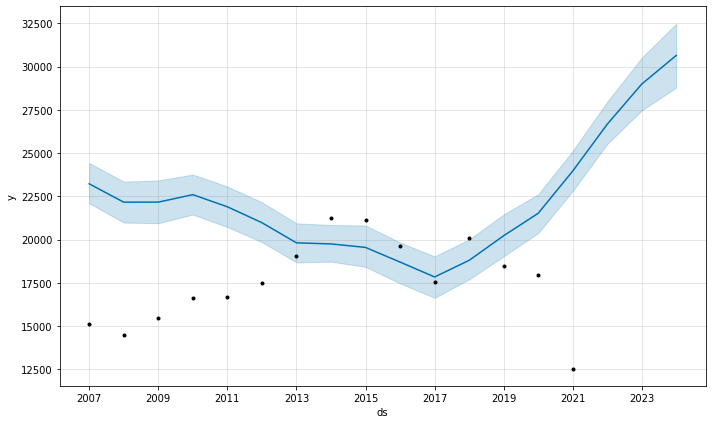

In [ ]:
# Create prophet model
model = prophet.Prophet()
model.add_regressor('CPI', mode='multiplicative')
model.fit(overall_df)

future = model.make_future_dataframe(periods=3, freq='Y')

future['CPI'] = np.append(annual_cpi, [304.634, 310.311, 313.578])

display(future)

forecast = model.predict(future)
fig = model.plot(forecast)
display(forecast)